[코알라] 주식 종료 가격 예측 경진대회 Stage 4 : EDA 및 변수 추가

안녕하세요. 데이크루 4기 코알라🐨 팀입니다. 

저희는 📈주식 종료 가격 예측 경진대회를 주제로 PBL를 수행합니다.

이번 활동을 통해 논리적인 접근 방식으로 모든 문제를 풀어갈 수 있는 데이커가 되는 것을 최종 목표로 하고 있습니다. 

Stage 4은 PBL을 구성하는 6가지 단계 중 네 번째 단계로서 탐색적 데이터분석(EDA) 및 변수 추가 내용을 담고있습니다.

다음의 포스팅은 데이크루 4기 활동으로 인하여 작성되었음을 알려드립니다.


# Stage 4
# 1. Review

본격적인 진행에 앞서, 지난 스테이지까지의 내용을 복습하고 넘어가겠습니다.

필요한 파일 로드와 패키지 로드는 많이 해왔으니 이 부분은 안내된 코드를 따라 진행해주시고, 전처리는 분량이 많아 이전 스테이지 링크로 대체하겠습니다.

<span style="background-color:plum; font-size:110%"> 데이터를 불러오기 위해 pandas 패키지를 import

<span style="background-color:plum; font-size:110%"> stock_list.csv 파일을 불러와서 stock_list 객체에 저장

<span style="background-color:plum; font-size:110%"> 종목리스트.csv 파일을 불러와서 df_in_tt 객체에 저장

<span style="background-color:plum; font-size:110%"> 주가파일.csv 파일을 불러와서 df_price 객체에 저장

<span style="background-color:plum; font-size:110%"> 코스피상폐현황.csv 파일을 불러와서 df_out_tt1 객체에 저장

<span style="background-color:plum; font-size:110%"> 코스닥상폐현황.csv 파일을 불러와서 df_out_tt2 객체에 저장

<span style="background-color:plum; font-size:110%"> 주가지수.csv 파일을 불러와서 df_index 객체에 저장

<span style="background-color:plum; font-size:110%"> 환율파일.csv 파일을 불러와서 df_usdkrw 객체에 저장  



### Inst.
각각의 파일은 드라이브에 practice_data 폴더를 생성한 후 여기에 저장해주세요.




### Hint.
```python
    
pd.read_csv('파일경로/파일명.확장자명', encoding='utf-8')
```

```python
import os
os.chdir('경로')
```
os.chdir()을 사용한다면 인자로 넣은 경로를 기본 디렉토리로 저장하게 됩니다.
    
예를 들어 stock_list.csv 파일이 C:/data 폴더에 저장되어 있을 때, 
    
os.chdir('C:/data')를 실행한 후에 파일을 불러온다면 pd.read_csv('stock_list.csv')로 불러올 수 있습니다.
    
    
### Solution.

In [1]:
import os

# 제 환경에선 이 경로에 파일이 저장되어있습니다.
os.chdir('./practice_data')

In [2]:
import pandas as pd
stock_list = pd.read_csv('./stock_list.csv')

df_in_tt = pd.read_csv('./종목리스트.csv', encoding= 'utf-8')

df_price = pd.read_csv('./주가파일.csv', encoding= 'utf-8' )

df_out_tt1 = pd.read_csv('./코스피상폐현황.csv', encoding= 'utf-8')

df_out_tt2 = pd.read_csv('./코스닥상폐현황.csv', encoding= 'utf-8')

df_index = pd.read_csv('./주가지수.csv', encoding= 'utf-8')

df_usdkrw = pd.read_csv('./환율파일.csv', encoding= 'utf-8')



데이터를 잘 불러오셨다면, 바로 이어서 패키지도 로드하겠습니다

<span style="background-color:plum; font-size:110%"> pandas 패키지를 pd로 import

<span style="background-color:plum; font-size:110%"> numpy 패키지를 np로 import

<span style="background-color:plum; font-size:110%"> datetime 패키지를 import

<span style="background-color:plum; font-size:110%"> requests 패키지를 req로 import

<span style="background-color:plum; font-size:110%"> lightgbm 패키지를 lgb로 import

<span style="background-color:plum; font-size:110%"> sklearn 패키지의 linear_model, metrics를 import

<span style="background-color:plum; font-size:110%"> sklearn 패키지의 impute 안에 있는 SimpleImputer을 import

<span style="background-color:plum; font-size:110%"> sklearn 패키지의 preprocessing 안에 있는 StandardScaler, RobustScaler, MinMaxScaler를 import

<span style="background-color:plum; font-size:110%"> sklearn 패키지의 ensemble 안에 있는 RandomForestClassifier, RandomForestRegressor을 import

<span style="background-color:plum; font-size:110%"> sklearn 패키지의 feature_selection에 있는 SelectKBest, f_regression, f_classifi을 import

<span style="background-color:plum; font-size:110%"> os, sys, random, warnings 패키지를 import
    

### Hint.

패키지를 설치하는 코드는 다음과 같습니다.
```python
import micropip
await micropip.install('사용하려는 패키지')
```
(sklearn 패키지의 경우 설치를 할 때는 scikit-learn 이라는 패키지명으로 설치됩니다.)


### Solution

In [5]:
import pandas as pd
import numpy as np
import datetime
import requests as req
import lightgbm as lgb
from sklearn import linear_model, metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
import os, sys, random, warnings



전처리는 분량이 많은 관계로, 이전 스테이지를 참고하여 복습해주세요!<br/>
https://dacon.io/competitions/official/236047/codeshare/7622?page=1&dtype=random


여기까지 문제없이 따라오셨다구요? 잘했습니다!

참고로 아래 진행할 내용들은 전처리 코드까지 모두 작성되어야 정상적으로 수행이 가능합니다.

그래서 설명은 글에서 확인하시고, 편하게 실행시킬 수 있도록 전처리 전체 코드를 아래 작성해드리겠습니다!

In [6]:
df_price['code'] = df_price['code'].astype(str)
df_price['code'] = df_price['code'].str.zfill(6) 

## 과거 상장폐지종목 추출 
df_out_tt1 = pd.read_csv('코스피상폐현황.csv', encoding='utf-8') 
df_out_tt2 = pd.read_csv('코스닥상폐현황.csv', encoding='utf-8') 

df_out_tt1['market'] = 'KOSPI'
df_out_tt2['market'] = 'KOSDAQ'
df_out_tt = pd.concat([df_out_tt1, df_out_tt2])
df_out_tt.rename(columns = {"종목코드":"code", "회사명":"code_nm", "폐지일자":"out_dt", "폐지사유":"out_desc"}, inplace = True)
df_out_tt['code'] = df_out_tt['code'].astype(str) 
df_out_tt['code'] = df_out_tt['code'].str.zfill(6) 
df_out_tt['out_dt'] = pd.to_datetime(df_out_tt['out_dt'])
df_out_tt = df_out_tt[["code", "code_nm", "out_dt", "out_desc", "market"]]

## 현재 상장종목 전체 추출 : FinanceDataReader
df_in_tt = pd.read_csv('종목리스트.csv', encoding='utf-8')
df_in_tt.columns = ['code', 'isu_cd', 'code_nm', 'market', 'dept', 'close', 'changecode', 'changes', 'chagesratio', 
                    'open', 'high', 'low', 'volume', 'amount', 'marcap', 'stocks', 'marketId']
df_in_tt = df_in_tt[(df_in_tt['market'] !='KONEX') &                
                    (df_in_tt.code.str.startswith('5') != True) &   
                    (df_in_tt.code.str.startswith('6') != True) &   
                    (df_in_tt.code.str.startswith('7') != True) &   
                    (df_in_tt.code.str.len() == 6)]
df_in_tt['in_yn'] = 1  

## 과거 상장폐지종목 + 현재 상장종목 결합
end_dt = datetime.datetime.now().strftime('%Y%m%d')   
df_stock_code = pd.merge(df_out_tt, df_in_tt, how='outer', on='code', suffixes=('_old', '_new'))
df_stock_code['in_yn'] = np.where(df_stock_code['in_yn'].notnull(), df_stock_code['in_yn'], 0)
df_stock_code['market'] = np.where(df_stock_code['market_new'].notnull(), df_stock_code['market_new'], df_stock_code['market_old'])
df_stock_code['code_nm'] = np.where(df_stock_code['code_nm_new'].notnull(), df_stock_code['code_nm_new'], df_stock_code['code_nm_old'])
df_stock_code['base_dt'] = pd.to_datetime(end_dt)
df_stock_code.rename(columns = {"ListingDate":"in_dt"}, inplace = True) 
df_stock_code = df_stock_code.sort_values(by=['code', 'base_dt'], axis=0, ascending=[True, False])  
df_stock_code = df_stock_code.drop_duplicates(['code'], keep='first')
df_stock_code = df_stock_code[['code','code_nm','in_yn','market','out_dt','out_desc','base_dt']]

df_stock_code = df_stock_code[(df_stock_code['in_yn'] == 1) | ((df_stock_code['in_yn'] == 0) & (df_stock_code['out_dt'] >= '2012-01-01'))]

다음 코드는 패키지 버전 차이로 띄워주는 경고 메시지를 없애는 코드입니다.

Warning 메시지도 중요한 메시지이지만 매번 발생되는 경우 원하는 출력 결과를 보기 위해서 스크롤을 계속 내려야 합니다. 

이 과정이 번거롭기 때문에 다음과 같이 잠시 경고 메시지를 warnings 라이브러리를 사용하여 숨길 수 있습니다.

In [52]:
import warnings
warnings.filterwarnings('ignore')

<span style="color:red">그럼 이제 본격적으로 Stage 4, 탐색적 데이터 분석(EDA) 및 변수 추가 를 시작하겠습니다!


# 2. 탐색적 데이터 분석(EDA)

먼저, 탐색적 데이터 분석이란 무엇일까요?

탐색적 데이터 분석이란, 벨연구소의 수학자 존 튜키가 개발한 데이터분석 방법론으로,
데이터를 다양한 각도에서 관찰하고 이해하는 모든 과정을 말한다고 합니다.

데이터 분석에 있어서 EDA는 매우 중요한 초기 분석 단계이며, 데이터를 분석하기 위해선 먼저 그 데이터를 이해하는 것이 매우 중요합니다.





EDA는 보통 4가지 방법을 통해 진행합니다.


1. 궁금한 정보를 시각화를 통해 보기 쉽게 표현
    - 현재 상장되어 있는 주식들의 상장년도 분포도 등을 예로 들 수 있습니다.<br><br/>
2. 여러가지 수치형 데이터들의 평균, 중앙값, 최대값, 최소값 등을 확인
    - df.describe()로 수행하며, 뒤에 나올 결측치 및 이상치를 판단하는 데에 사용되기도 합니다.
    - 상관분석은 두 변수간에 상관관계가 있는지를 확인하는 분석법으로, 주로 독립변수와 종속변수간의 상관관계가 있는지를 판단하기 위해 사용합니다.<br><br/>

3. 결측치 / 이상치 여부 판단 및 대처
    - 결측치 / 이상치일 경우 이 데이터(행)을 제거하거나, 다른 적절한 값으로 대체하는 등의 방법을 사용합니다.<br><br/>

4. 데이터 간의 관계 파악

이 네가지의 모든 방법을 다 사용할 수도 있고, 일부만 사용할 수도 있습니다.

EDA는 데이터 분석의 물꼬를 트는 행위라고도 볼 수 있는 만큼, 내용이 상당히 방대합니다.<br>
그리고 저희가 사용하는 주가 데이터에서는 보여줄 수 있는 기법에도 한계가 있습니다.

<span style="color:red"> 그래서 이번 스테이지에서 우리는 1번만 간단하게 진행해보도록 할게요!



Text(0.5, 0, 'Samsung Electronics Stock price')

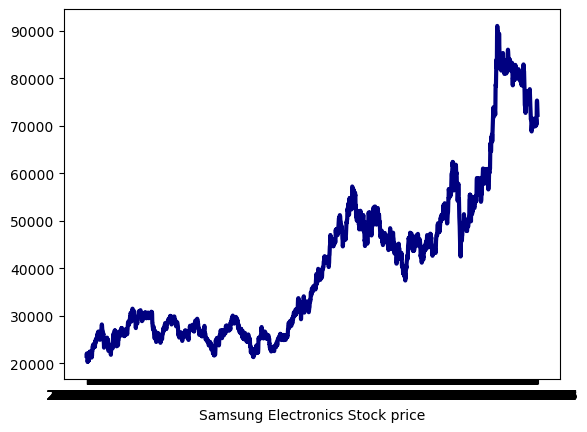

In [53]:
# matplotlib 패키지의 pyplot 모듈을 plt로 로드
import matplotlib.pyplot as plt

# 삼성전자 주식 데이터의 날짜를 x축으로, 종가를 y축으로, 선의 굵기는 3, 선의 색은 남색으로 그래프 생성
plt.plot(df_price["dt"],df_price["end"], color="navy" , linewidth = 3)

# X축 라벨을 ‘Samsung Electronic Stock price’로 지정
plt.xlabel('Samsung Electronics Stock price')

간단한 코드 몇줄로 주식차트를 만들 수 있었습니다!

그렇다면 이번에는, 달러 환율 차트를 한번 직접 그려봅시다.


In [54]:
# matplotlib 패키지의 pyplot 모듈을 plt로 로드

# df_usdkrw 데이터의 dt 변수를 x축으로, end_usdkrw를 y축으로 하여 그래프 생성

# 그래프의 x축에 “date” 라는 글자를, y축에 “exchange rate” 라는 글자를, 그리고 그래프의 제목에 “Graph_example” 이라는 글자를 추가


### Hint.
그래프의 x축에 라벨을 표시할 때는 **plt.xlabel('라벨')** 을, <br>

y축에 라벨을 표시할 때는 **plt.ylabel('라벨')** 을, <br>

제목에 라벨을 표시할 떄는 **plt.title('라벨')** 을 입력합니다.

### Solution.


Text(0.5, 1.0, 'Graph_exmaple')

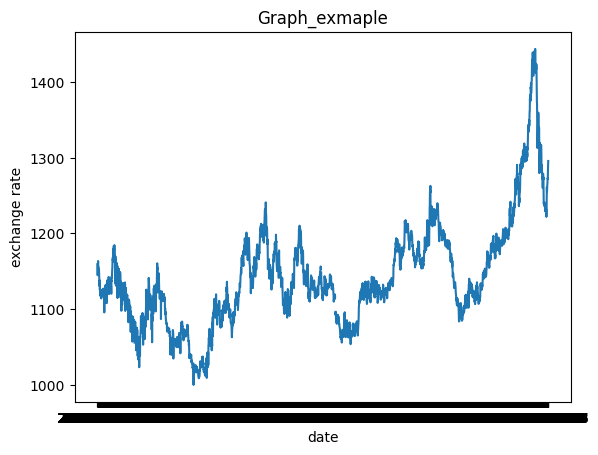

In [55]:
import matplotlib.pyplot as plt
plt.plot(df_usdkrw['dt'], df_usdkrw['end_usdkrw'])
plt.xlabel('date')
plt.ylabel('exchange rate')
plt.title('Graph_exmaple')


괜찮으셨나요?
그렇다면 이번엔, matplotlib 패키지가 아닌 다른 패키지를 사용해서 시각화해보겠습니다.


<AxesSubplot:xlabel='out_dt', ylabel='count'>

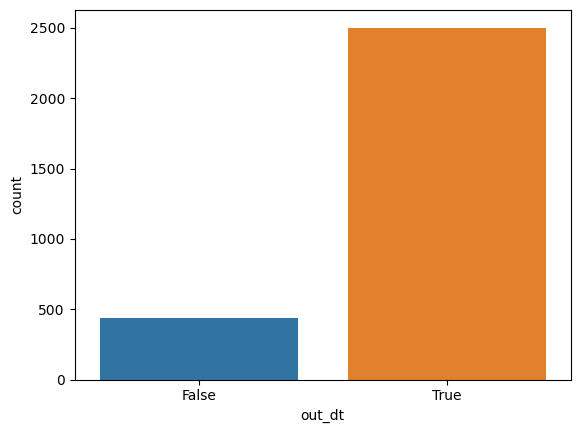

In [56]:
# seaborn 패키지를 sns로 로드
import seaborn as sns

# 2012년부터 2021년 11월 26일까지의 주식 종목 중 상장폐지 여부
sns.countplot(x = df_stock_code['out_dt'].isna())

countplot은 이름 그대로 빈도수를 그래프로 그리는 함수입니다.

df_stock_code['out_dt'].isna() 는 df_stock_code 데이터에서 out_dt 컬럼이 결측치면 True를, 값이 들어있으면 False를 반환합니다.

즉, 위 그래프에서 True는 상장폐지된 종목을 의미하고, False는 여전히 상장되어 있는 종목을 의미합니다.


이해가 되셨나요?
한 번 seaborn 패키지도 직접 활용해보겠습니다!



In [57]:
# seaborn 패키지를 sns로 import

# 상장폐지된 종목 중 코스피, 코스닥의 빈도를 시각화(df_out_tt 파일의 market 컬럼)

# 그래프의 제목에 “Kospi/Kosdaq delisting count” 를 추가



### Solution.


Text(0.5, 1.0, 'Kospi/Kosdaq delisting count')

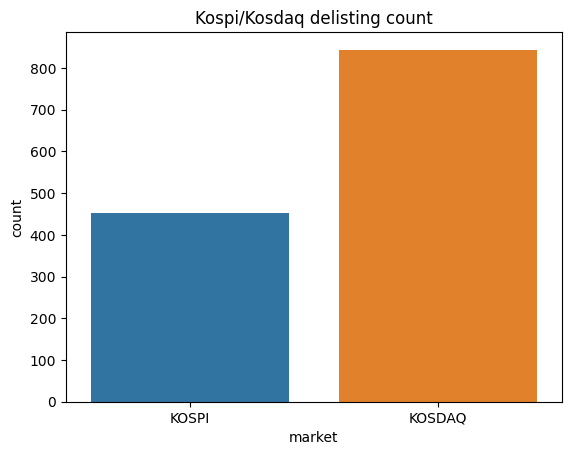

In [58]:
import seaborn as sns
sns.countplot(x = df_out_tt['market'])
plt.title('Kospi/Kosdaq delisting count')

그래프를 그리기 위해 이전에는 matplotlib 패키지를 사용했고, 이번에는 seaborn 패키지를 사용했습니다.

matplotlib 패키지는 시각화를 하는데에 있어 기본이 되는 패키지 중 하나이고,
seaborn 패키지는 matplotlib 패키지를 기반으로 조금 더 사용하기 편하도록 다듬어진 패키지입니다.

seaborn 패키지는 matplotlib 패키지를 기반으로 만들어졌기 때문에, 그래프에 제목을 추가하는 것과 같은 명령어는 plt.title로 가능합니다.

실전에서는 matplotlib와 seaborn 둘다 자주 사용하는 패키지이니, 둘 다 익혀두시는 것을 추천드립니다.



# 3. 변수 추가

간단한 EDA를 마치고, 분석에 필요한 변수를 추가해볼게요!

주어진 데이터를 다듬어서 바로 분석을 할 수도 있지만, 주어진 데이터를 바탕으로 새로운 변수를 추가하는 것 또한 중요한 역할을 수행합니다.



예를 들어, 습도와 온도에 따른 에어컨 사용률을 예측하고자 한다고 가정해봅시다.

일반적으로 습도가 높을수록 에어컨 사용률이 높을 것이고, 마찬가지로 온도가 높을수록 에어컨 사용률도 높을 것입니다.

기온이 28도인 날에는 습도가 높으면 높을수록 에어컨을 더 많이 사용하겠죠?


하지만 기온이 10도인 상황에서는, 습도가 아무리 높다고 하더라도 에어컨은 틀지 않겠죠.

이와 같은 상황을 반영하려면, 에어컨을 틀기 위한 최소 온도를 기준으로 하여 이 날이 에어컨을 틀만한 날인지, 건드리지도 않을 날인지를 판단할 수 있는 변수를 만들어야 합니다.

가령, 오늘의 기온이 24도 이상인지, 아닌지에 따라 서로 다른 값을 부여하는 변수를 만들수도 있겠죠.



이처럼, 변수 추가는 변수속에 숨어있는 다양한 의미를 활용하기 위해 필요한 또 하나의 중요한 기법입니다.

이제 그 중요성을 잘 알겠나요?



본격적으로 변수를 추가하기 전에, 종속변수로 사용할 변수의 값을 채워넣겠습니다.
종속변수 값이 왜 필요한지는 Stage 5에서 좀 더 자세히 다뤄보도록 할게요!

먼저 학습 대상의 종목을 선정하겠습니다.

In [71]:
stock_list['종목코드'] = stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
stock_list = stock_list.rename(columns = {"종목코드":"code"}) 


여기까지는 지난번 전처리 부분에서 했던 부분이니, 어렵지 않게 따라오실 수 있을겁니다.
종목코드를 6자리 숫자로 맞춰주고, 컬럼명을 ‘종목코드’에서 ‘code’로 바꾸는 코드입니다.



In [72]:
#  '주가파일'을 기준으로 시가(open), 종가(end) 그리고 거래량(cnt)이 모두 0보다 큰 것들로 df_master 데이터프레임을 만듭니다. 
df_master = df_price[(df_price['open'] > 0) & (df_price['end'] > 0) & (df_price['cnt'] > 0)]

# df_master의 종가와 거래량을 곱해 거래대금(‘amt’)를 df_master에 추가해줍니다.
df_master['amt']  = df_master['end'] * df_master['cnt']   

## Target 생성


In [73]:
df_master = df_master.sort_values(by=['code', 'dt'], axis=0, ascending=[True, False])  
df_master['num'] = df_master.groupby('code')['dt'].rank(ascending=True).astype(int)
df_master['y_01d_yn']  = np.where(df_master['code'] == df_master['code'].shift(1), 1, 0)  
df_master['y_02d_yn']  = np.where(df_master['code'] == df_master['code'].shift(2), 1, 0)  
df_master['y_03d_yn']  = np.where(df_master['code'] == df_master['code'].shift(3), 1, 0)  
df_master['y_04d_yn']  = np.where(df_master['code'] == df_master['code'].shift(4), 1, 0)  
df_master['y_05d_yn']  = np.where(df_master['code'] == df_master['code'].shift(5), 1, 0)  
df_master['y_rt_01d_eeup']  = df_master['end'].shift(1) / df_master['end']
df_master['y_rt_02d_eeup']  = df_master['end'].shift(2) / df_master['end']
df_master['y_rt_03d_eeup']  = df_master['end'].shift(3) / df_master['end']
df_master['y_rt_04d_eeup']  = df_master['end'].shift(4) / df_master['end']
df_master['y_rt_05d_eeup']  = df_master['end'].shift(5) / df_master['end']




shift( ) 메소드는, 괄호 안에 들어가있는 숫자만큼 뒤로 보내는 기능을 수행합니다.

<img src = "https://cherry-orbit-69a.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F2ee638f8-79fc-4342-9594-f01823091de5%2FUntitled.png?id=60ba099a-64f7-4ed3-99bd-06513f5c2c62&table=block&spaceId=9b3f14ce-6c75-4c95-8989-493ed6e93a8a&width=90&userId=&cache=v2">



예를 들어 위와 같은 데이터가 있을 때, c.shift(3)을 입력한다면 3칸씩 뒤로 밀리게 됩니다.

<img src = "https://cherry-orbit-69a.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F3dd5ae44-3cac-48ed-a5ef-0949b0dd5129%2FUntitled.png?id=5c5e5cc7-1d15-43a5-b556-ed389ebd674a&table=block&spaceId=9b3f14ce-6c75-4c95-8989-493ed6e93a8a&width=90&userId=&cache=v2">


우리는 기준 일의 데이터를 바탕으로 향후 5일까지의 데이터를 예측해야 하기 때문에, 5칸까지의 shift를 진행해서 변수를 만들어주었습니다.

```python
df_master['y_rt_04d_eeup']  = df_master['end'].shift(4) / df_master['end']
```

예를 들어, 4일 전의 종가를 오늘의 종가로 나눈 것은 ‘y_rt_04d_eeup’으로 지정해줍니다.






## 외부 변수 결합 : 환율, 주가지수


In [74]:
df_master = df_master.sort_values(by=['code', 'dt'], axis=0) 
df_master = pd.merge(df_master, df_index[['dt', 'end_kpi', 'end_ksd']], how='left', on='dt')
df_master = pd.merge(df_master, df_stock_code[['code', 'market']], how='left', on='code')

# df_master 데이터 프레임에 merge 메서드를 이용하여 dt, end_lpi, end_ksd 항목을 추가합니다. 이 때 how=’left’, on=’dt’로 병합 방식을 지정했는데, 이는 df_master 데이터프레임 내 dt를 기준으로 합병합니다.

df_master['x_rt_end_index']  = np.where(df_master['market'] == 'KOSPI', df_master['end'] / df_master['end_kpi'], df_master['end'] / df_master['end_ksd'])
df_master = pd.merge(df_master, df_usdkrw[['dt', 'end_usdkrw']], how='left', on='dt')
df_master['x_rt_end_usdkrw'] = df_master['end'] / df_master['end_usdkrw']



마찬가지로, Numpy 모듈의 where를 이용해 x_rt_end_index와 x_trt_end_usdkrw 변수를 추가합니다.

## 시/저/고/저 파생


In [75]:
df_master['avg_amt_20'] = df_master['amt'].rolling(window=20).mean() 
df_master['x_rt_h_l']  = np.where(df_master['low'] == 0,  np.nan, df_master['high'] / df_master['low'])
df_master['x_rt_e_s']  = np.where(df_master['open'] == 0,  np.nan, df_master['end'] / df_master['open'])   
df_master['x_rt_e_l']  = np.where(df_master['low'] == 0,  np.nan, df_master['end'] / df_master['low']) 
df_master['x_rt_h_s']  = np.where(df_master['open'] == 0,  np.nan, df_master['high'] / df_master['open'])   
df_master['x_rt_s_l']  = np.where(df_master['low'] == 0,  np.nan, df_master['open'] / df_master['low'])  
df_master['x_rt_bf_1']  = np.where(df_master['end'].shift(1) == 0,   np.nan, df_master['end'] / df_master['end'].shift(1))



이 코드에서는 Numpy 모듈의 rolling 메서드가 처음 나오는데요. rolling 메서드는 이동평균을 구하는 데 사용한다고 할 수 있습니다. 그렇다면 이동평균은 무엇일까요?

X축과 Y축으로 구분된 좌표평면이 있다고 가정해봅시다. 이 가정에서의 이동평균은 x축 방향으로 알고싶은 범위(가령 한 달, 일주일)가 이동하면서 대응하는 Y값의 평균을 지칭합니다. 

이러한 이동평균을 구하기 쉽게 하기 위해 rolling() 메서드를 사용한 것입니다. 
```python
df_master['avg_amt_20'] = df_master['amt'].rolling(window=20).mean() 
```
rolling 메서드의 argument인 window는 구간을 지정합니다. 이 코드는 즉 20일 간의 이동평균을 구하는 것임을 알 수 있습니다. 

그 아래 코드들은 파생변수를 선언합니다. 0을 기준으로 잡고 저가 / 시가 / 종가가 0일 경우 결측값을, 그렇지 않으면 그에 맞는 식을 삽입하여 값을 채우고 있습니다.

## 과거 평균 대비 이격도 Feature 

- 주식에서 이격도란?

이격도는 주가와 이동평균선 간의 괴리 정도를 보여주는 지표로 **당일의 주가를 이동평균치로 나눈 백분율 값**입니다. <br>

이격도는 투자시점을 포착하는데 주로 활용하는 기술적 지표이며, 값이 <span style="color:red">**100% 이상**</span>이면 당일 주가가 이동평균선보다 <span style="color:red">**위**</span>에, <span style="color:blue">**100% 이하**</span>이면 이동평균보다 <span style="color:blue">**아래**</span>에 위치한 상태를 의미합니다.

N일 이동평균지수는 분석자에 따라 다르게 설정할 수 있으며, 앞으로의 분석에서는 3일 10일, 40일, 80일로 진행합니다.

아래의 코드는 이격도를 구현하는 코드입니다.


In [76]:
k  = 3; k2 = 10; k3 = 40; k4 = 80

dl_num_cols = ['open', 'high', 'low', 'end', 'amt', 'end_kpi', 'end_ksd', 'x_rt_end_index',
               'x_rt_bf_1', 'x_rt_e_s', 'x_rt_e_l', 'end_usdkrw', 'x_rt_end_usdkrw' ] 

dl_cols =[('x_rt_bf_1_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].shift(1) == 0,  np.nan, df_master[dl_num_cols] / df_master[dl_num_cols].shift(1))

dl_cols =[('x_rt_ma_k_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols]-df_master[dl_num_cols].rolling(window=k).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols] >= df_master[dl_num_cols].rolling(window=k).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))

 
dl_cols =[('x_rt_ma_k2_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k2).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols]-df_master[dl_num_cols].rolling(window=k2).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols] >= df_master[dl_num_cols].rolling(window=k2).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))

   
dl_cols =[('x_rt_ma_k_k2_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k2).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols].rolling(window=k).mean()-df_master[dl_num_cols].rolling(window=k2).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols].rolling(window=k).mean() >= df_master[dl_num_cols].rolling(window=k2).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))
 
dl_cols =[('x_rt_ma_k3_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k3).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols]-df_master[dl_num_cols].rolling(window=k3).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols] >= df_master[dl_num_cols].rolling(window=k3).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))
 
dl_cols =[('x_rt_ma_k_k3_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k3).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols].rolling(window=k).mean()-df_master[dl_num_cols].rolling(window=k3).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols].rolling(window=k).mean() >= df_master[dl_num_cols].rolling(window=k3).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))
 
    

dl_cols =[('x_rt_ma_k2_k3_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k3).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols].rolling(window=k2).mean()-df_master[dl_num_cols].rolling(window=k3).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols].rolling(window=k2).mean() >= df_master[dl_num_cols].rolling(window=k3).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))
 
dl_cols =[('x_rt_ma_k4_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k4).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols]-df_master[dl_num_cols].rolling(window=k4).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols] >= df_master[dl_num_cols].rolling(window=k4).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))

dl_cols =[('x_rt_ma_k_k4_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k4).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols].rolling(window=k).mean()-df_master[dl_num_cols].rolling(window=k4).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols].rolling(window=k).mean() >= df_master[dl_num_cols].rolling(window=k4).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))
 
dl_cols =[('x_rt_ma_k2_k4_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k4).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols].rolling(window=k2).mean()-df_master[dl_num_cols].rolling(window=k4).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols].rolling(window=k2).mean() >= df_master[dl_num_cols].rolling(window=k4).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))
 
dl_cols =[('x_rt_ma_k3_k4_' + w) for w in dl_num_cols]
df_master[dl_cols]  = np.where(df_master[dl_num_cols].rolling(window=k4).mean() == 0,  np.nan, 
                            (df_master[dl_num_cols].rolling(window=k3).mean()-df_master[dl_num_cols].rolling(window=k4).mean()) / df_master[dl_num_cols].rolling(window=k2).mean())  
df_master[dl_cols] = np.where(df_master[dl_num_cols].rolling(window=k3).mean() >= df_master[dl_num_cols].rolling(window=k4).mean(), 
                            abs(df_master[dl_cols]), -abs(df_master[dl_cols]))

## 단순이동평균 대비 지수이동평균 대비 이격도


In [77]:
for col in dl_num_cols:
    str_ma05 = 'ma05_' + col
    str_ema05 = 'ema05_' + col
    str_rt_ema05_ma05 = 'x_rt_ema05_ma05_' + col
    df_master[str_ma05] = df_master[col].rolling(window=5).mean() 
    df_master[str_ema05]  = df_master[col].shift(5) 
    tmp1 = 0.7 	
    for i in range(5):
        df_master[str_ema05]  = (df_master[col].shift(5-1-i) * tmp1) + (df_master[str_ema05] * (1-tmp1))
    df_master[str_rt_ema05_ma05] = np.where(df_master[str_ma05] == 0,  np.nan, (df_master[str_ema05]-df_master[str_ma05]) / df_master[str_ma05])  
    df_master[str_rt_ema05_ma05] = np.where(df_master[str_ema05] >= df_master[str_ma05], abs(df_master[str_rt_ema05_ma05]), -abs(df_master[str_rt_ema05_ma05]))   

    str_ma20 = 'ma20_' + col
    str_ema20 = 'ema20_' + col
    str_rt_ema20_ma20 = 'x_rt_ema20_ma20_' + col
    df_master[str_ma20] = df_master[col].rolling(window=20).mean() 
    df_master[str_ema20]  = df_master[col].shift(20) 
    tmp1 = 0.7 	
    for i in range(20):
        df_master[str_ema20]  = (df_master[col].shift(20-1-i) * tmp1) + (df_master[str_ema20] * (1-tmp1))
    df_master[str_rt_ema20_ma20] = np.where(df_master[str_ma20] == 0,  np.nan, (df_master[str_ema20]-df_master[str_ma20]) / df_master[str_ma20])  
    df_master[str_rt_ema20_ma20] = np.where(df_master[str_ema20] >= df_master[str_ma20], abs(df_master[str_rt_ema20_ma20]), -abs(df_master[str_rt_ema20_ma20]))  

    str_ma40 = 'ma40_' + col
    str_ema40 = 'ema40_' + col
    str_rt_ema40_ma40 = 'x_rt_ema40_ma40_' + col
    df_master[str_ma40] = df_master[col].rolling(window=40).mean() 
    df_master[str_ema40]  = df_master[col].shift(40) 
    tmp1 = 0.7 	
    for i in range(40):
        df_master[str_ema40]  = (df_master[col].shift(40-1-i) * tmp1) + (df_master[str_ema40] * (1-tmp1))
    df_master[str_rt_ema40_ma40] = np.where(df_master[str_ma40] == 0,  np.nan, (df_master[str_ema40]-df_master[str_ma40]) / df_master[str_ma40])  
    df_master[str_rt_ema40_ma40] = np.where(df_master[str_ema40] >= df_master[str_ma40], abs(df_master[str_rt_ema40_ma40]), -abs(df_master[str_rt_ema40_ma40]))  

    str_ma80 = 'ma80_' + col
    str_ema80 = 'ema80_' + col
    str_rt_ema80_ma80 = 'x_rt_ema80_ma80_' + col
    df_master[str_ma80] = df_master[col].rolling(window=80).mean() 
    df_master[str_ema80]  = df_master[col].shift(80) 
    tmp1 = 0.7 	
    for i in range(80):
        df_master[str_ema80]  = (df_master[col].shift(80-1-i) * tmp1) + (df_master[str_ema80] * (1-tmp1))
    df_master[str_rt_ema80_ma80] = np.where(df_master[str_ma80] == 0,  np.nan, (df_master[str_ema80]-df_master[str_ma80]) / df_master[str_ma80])  
    df_master[str_rt_ema80_ma80] = np.where(df_master[str_ema80] >= df_master[str_ma80], abs(df_master[str_rt_ema80_ma80]), -abs(df_master[str_rt_ema80_ma80]))  



## Lag 변수		

머신러닝에서 입력되는 데이터는 간혹 시계열 데이터가 있습니다.  머신러닝에서는 이전 데이터를 현재 데이터에 넣으면 좀 더 정확한 학습이 가능한 경우가 있습니다. 이것을 lag(지연) 데이터라고 표현합니다.

In [78]:
dl_code = ['x_rt_bf_1', 'x_rt_h_l', 'x_rt_e_s', 'x_rt_e_l']
for m in range(10):   
    for code in dl_code:
        str_x = 'x_lag_' + code + str(m+1) 	
        df_master[str_x] = df_master[code].shift(m+1)


## NVI(Negative Volume Index)

- NVI란?

NVI는 현명한 투자가는 거래량이 감소된 소강상태의 시장에서 매매를 행하는 반면에 일반 대중은 거래량이 충분히 증가된 상태에서 매매를 한다는 기본가정에서 출발합니다.

따라서 이 지표는 전일에 비해서 거래량이 감소했을 경우에만 관심을 가집니다.

- 당일의 거래량이 전일보다 감소했을 경우

$$
NVI = 전일의 NVI + {당일종가 -전일종가\over 전일종가} \times 100 $$

- 거래량이 같거나 증가했을 경우

$$
NVI = 전일의 NVI$$

아래 코드는 NVI를 구현하는 코드입니다.

In [79]:
# end + cnt
df_master['x_ind_nvi_10'] = 100
df_master['cnt_tmp'] = df_master['cnt'].shift(10)
df_master['end_tmp'] = df_master['end'].shift(10) 
for i in range(9, -1, -1):  
	df_master['tmp1'] = np.where(df_master['end_tmp'] == 0, np.nan, 
								   ((df_master['end'].shift(i) - df_master['end_tmp']) / df_master['end_tmp']) * 100)
	df_master['x_ind_nvi_10'] = np.where(df_master['cnt'].shift(i) < df_master['cnt_tmp'], df_master['x_ind_nvi_10'] + df_master['tmp1'], 
										df_master['x_ind_nvi_10'])
	df_master['cnt_tmp'] = df_master['cnt'].shift(i)
	df_master['end_tmp'] = df_master['end'].shift(i)
	
# high + cnt	
df_master['x_ind_h_nvi_10'] = 100
df_master['cnt_tmp'] = df_master['cnt'].shift(10)
df_master['high_tmp'] = df_master['high'].shift(10) 
for i in range(9, -1, -1):  
	df_master['tmp1'] = np.where(df_master['high_tmp'] == 0, np.nan, 
								   ((df_master['high'].shift(i) - df_master['high_tmp']) / df_master['high_tmp']) * 100)
	df_master['x_ind_h_nvi_10'] = np.where(df_master['cnt'].shift(i) < df_master['cnt_tmp'], df_master['x_ind_h_nvi_10'] + df_master['tmp1'], 
										df_master['x_ind_h_nvi_10'])
	df_master['cnt_tmp'] = df_master['cnt'].shift(i)
	df_master['high_tmp'] = df_master['high'].shift(i)
	

# low + cnt	
df_master['x_ind_l_nvi_10'] = 100
df_master['cnt_tmp'] = df_master['cnt'].shift(10)
df_master['low_tmp'] = df_master['low'].shift(10) 
for i in range(9, -1, -1):  
	df_master['tmp1'] = np.where(df_master['low_tmp'] == 0, np.nan, 
								   ((df_master['low'].shift(i) - df_master['low_tmp']) / df_master['low_tmp']) * 100)
	df_master['x_ind_l_nvi_10'] = np.where(df_master['cnt'].shift(i) < df_master['cnt_tmp'], df_master['x_ind_l_nvi_10'] + df_master['tmp1'], 
										df_master['x_ind_l_nvi_10'])
	df_master['cnt_tmp'] = df_master['cnt'].shift(i)
	df_master['low_tmp'] = df_master['low'].shift(i)




## PVI(Positive Volume Index)

- PVI란?

PVI는 NVI에 정반대의 관점에서 출발하는 지표입니다.

- 당일의 거래량이 전일보다 증가했을 경우

$$
PVI = 전일의 PVI + {당일종가 -전일종가\over 전일종가} \times 100 $$

- 거래량이 같거나 감소했을 경우

$$
PVI = 전일의 PVI$$

아래 코드는 PVI를 구현하는 코드니다.

In [80]:
# end + cnt
df_master['x_ind_pvi_10'] = 100
df_master['cnt_tmp'] = df_master['cnt'].shift(10) 
df_master['end_tmp'] = df_master['end'].shift(10) 

for i in range(9, -1, -1):  
    df_master['tmp1'] = np.where(df_master['end_tmp'] == 0, np.nan, ((df_master['end'].shift(i) - df_master['end_tmp']) / df_master['end_tmp']) * 100)
    df_master['x_ind_pvi_10'] = np.where(df_master['cnt'].shift(i) > df_master['cnt_tmp'], df_master['x_ind_pvi_10'] + df_master['tmp1'], df_master['x_ind_pvi_10'])
    df_master['cnt_tmp'] = df_master['cnt'].shift(i)
    df_master['end_tmp'] = df_master['end'].shift(i)

# high + cnt
df_master['x_ind_h_pvi_10'] = 100
df_master['cnt_tmp'] = df_master['cnt'].shift(10) 
df_master['high_tmp'] = df_master['high'].shift(10) 
for i in range(9, -1, -1):  
    df_master['tmp1'] = np.where(df_master['high_tmp'] == 0, np.nan, ((df_master['high'].shift(i) - df_master['high_tmp']) / df_master['high_tmp']) * 100)
    df_master['x_ind_h_pvi_10'] = np.where(df_master['cnt'].shift(i) > df_master['cnt_tmp'], df_master['x_ind_h_pvi_10'] + df_master['tmp1'], df_master['x_ind_h_pvi_10'])
    df_master['cnt_tmp'] = df_master['cnt'].shift(i)
    df_master['high_tmp'] = df_master['high'].shift(i)

# low + cnt
df_master['x_ind_l_pvi_10'] = 100
df_master['cnt_tmp'] = df_master['cnt'].shift(10) 
df_master['low_tmp'] = df_master['low'].shift(10) 
for i in range(9, -1, -1):  
    df_master['tmp1'] = np.where(df_master['low_tmp'] == 0, np.nan, ((df_master['low'].shift(i) - df_master['low_tmp']) / df_master['low_tmp']) * 100)
    df_master['x_ind_l_pvi_10'] = np.where(df_master['cnt'].shift(i) > df_master['cnt_tmp'], df_master['x_ind_l_pvi_10'] + df_master['tmp1'], df_master['x_ind_l_pvi_10'])
    df_master['cnt_tmp'] = df_master['cnt'].shift(i)
    df_master['low_tmp'] = df_master['low'].shift(i)



## Rule Feature


In [81]:
df_master['x_cls_01'] = np.where((df_master['open'] < df_master['end']) & (df_master['high'] > df_master['end']) & (df_master['high']/df_master['end'].shift(1) <=1.01), 1,
                        np.where((df_master['open'] < df_master['end']) & (df_master['high'] > df_master['end']), 2, 3))

dl_list = df_master.columns[pd.Series(df_master.columns).str.startswith('x_cls_')]   

df_master[dl_list] = df_master[dl_list].astype(str)

이상으로 ‘EDA 및 변수 추가’ 주제 Stage 4이였습니다.

다음 Stage 5에는 본격적인 분석에 앞서 분석의 핵심이 되는 모델을 설명하고, 모델 학습을 진행하는 내용을 가지고 찾아오도록 하겠습니다.

<span style="color:red"> 다음에 또 만나요!

    